In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file
vit_df = pd.read_csv('/content/vitamins_data.csv')

In [3]:
#shape method gives us the shape of our dataframe
vit_df.shape

(31, 4)

In [4]:
#getting the info of vitamins dataset
vit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 31 non-null     object 
 1   Population(0-6)years  31 non-null     int64  
 2   VitA_deficit%         29 non-null     float64
 3   VitD_deficit%         31 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
#top 5 rows of dataset
vit_df.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%
0,India,163819614,17.6,13.8
1,Delhi,2016849,17.8,32.5
2,Haryana,3335537,26.1,27.6
3,Himachal Pradesh,793137,5.9,4.6
4,Jammu & Kashmir,1485803,8.7,22.9


In [6]:
#last 5 rows of dataset
vit_df.tail()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%
26,Andhra Pradesh,10171857,20.8,4.9
27,Karnataka,7182100,9.6,4.8
28,Kerala,3793146,17.1,11.8
29,Tamil Nadu,7235160,13.1,1.4
30,Telengana,2018565,26.5,9.6


In [7]:
#describe method shows statistical summer of columns that has numeric data 
vit_df.describe()

,Population(0-6)years,VitA_deficit%,VitD_deficit%
count,3.100000e+01,29.000000,31.000000
mean,1.062292e+07,17.431034,15.793548
std,2.919329e+07,9.733782,13.266699
min,7.819500e+04,2.400000,1.100000
25%,6.305580e+05,9.600000,6.100000
50%,3.554916e+06,17.100000,12.800000
75%,8.852130e+06,21.400000,22.800000
max,1.638196e+08,43.200000,52.100000


In [8]:
#let's go through the state column and see whether it has any incorrect data.
vit_df["State"]

0                 India
1                 Delhi
2               Haryana
3      Himachal Pradesh
4       Jammu & Kashmir
5                Punjab
6             Rajasthan
7           Uttarakhand
8           Chhatisgarh
9        Madhya Pradesh
10        Uttar Pradesh
11                Bihar
12             Jharkand
13               Odisha
14          West Bengal
15    Arunachal Pradesh
16                Assam
17              Manipur
18            Meghalaya
19              Mizoram
20             Nagaland
21               Sikkim
22              Tripura
23                  Goa
24              Gujarat
25          Maharashtra
26       Andhra Pradesh
27            Karnataka
28               Kerala
29           Tamil Nadu
30            Telengana
Name: State, dtype: object

In [9]:
#in the above cell we can see that State column has India in it and India is not a state so we will drop this row.
vitamin_df = vit_df.drop(labels=[0],axis=0)

In [10]:
vitamin_df

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%
1,Delhi,2016849,17.8,32.5
2,Haryana,3335537,26.1,27.6
3,Himachal Pradesh,793137,5.9,4.6
4,Jammu & Kashmir,1485803,8.7,22.9
5,Punjab,3171829,17.2,52.1
6,Rajasthan,10651002,NaN,25.2
7,Uttarakhand,1360032,14.3,46.4
8,Chhatisgarh,3554916,26.6,10.5
9,Madhya Pradesh,10782214,27.1,7.7
10,Uttar Pradesh,31624628,17.1,13.2


In [11]:
#isnull() will show all the data and flase where there is not null and true where there is Nan or null value. 
#Using sum method will give the sum of null data in particular column
vitamin_df.isnull().sum()

State                   0
Population(0-6)years    0
VitA_deficit%           2
VitD_deficit%           0
dtype: int64

In [12]:
#in the above cell we can see that we have 2 null values in the VitA_deficit% column.
#So, for columns that have numerical data we will fill it with median and columns that have categorical data we will fill it with mode.
vitamin_df['VitA_deficit%'].fillna(vitamin_df['VitA_deficit%'].median(), inplace=True)

In [13]:
#let's check the null values again.
vitamin_df.isnull().sum()

State                   0
Population(0-6)years    0
VitA_deficit%           0
VitD_deficit%           0
dtype: int64

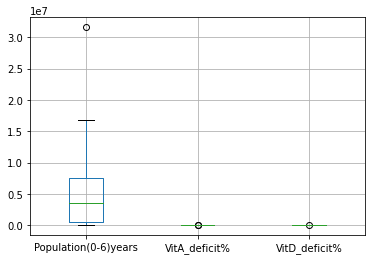

In [14]:
#plotting boxplot to see whether if we have any outliers in our data set.
vitamin_df.boxplot(column=["Population(0-6)years","VitA_deficit%","VitD_deficit%"])

**From the above plot we can see that our dataset doesn't have much outliers so there is no need to remove them.**

Each state's population between 0 to 6 years of age


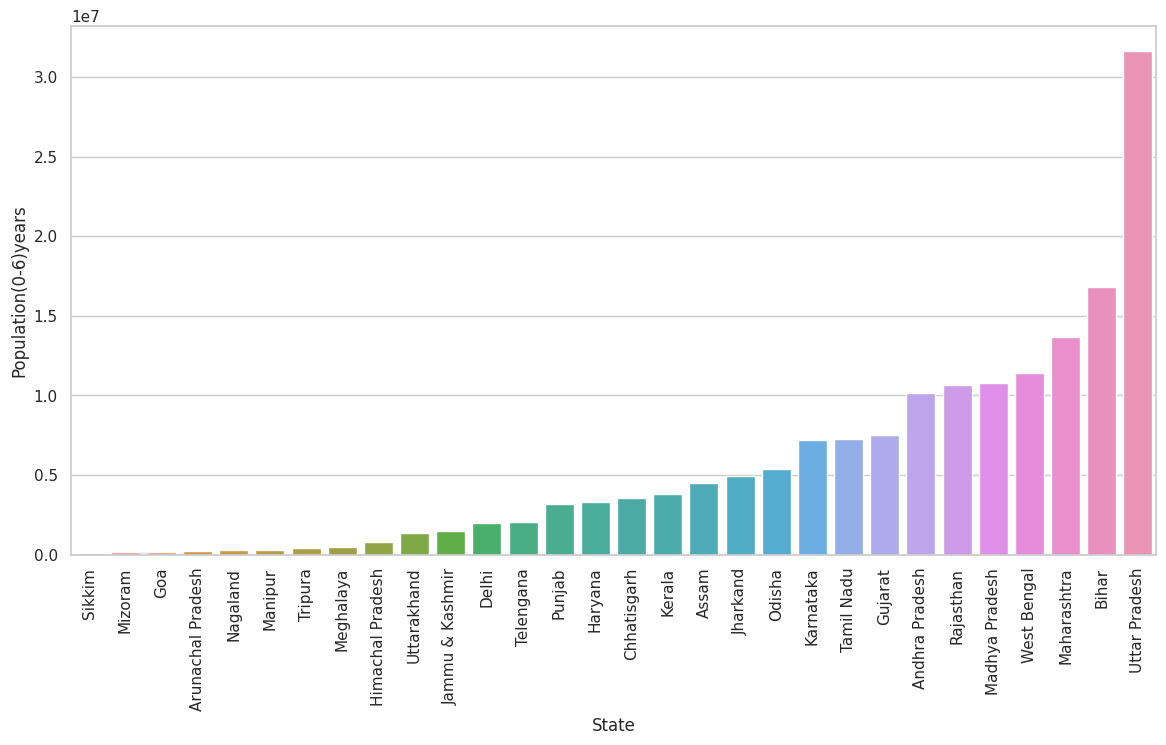

In [15]:
#plotting each state's population(0-6 years)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7),dpi=100)
plt.xticks(rotation=90);
ax = sns.barplot(x=vitamin_df.sort_values('Population(0-6)years')['State'], y="Population(0-6)years", data=vitamin_df)
print("Each state's population between 0 to 6 years of age")

**From the above graph we can see that Uttar Pradesh, Bihar and Maharashtra has the highest number of population as compared to other states.**

Below graph shows the deficiency of Vit A in each state


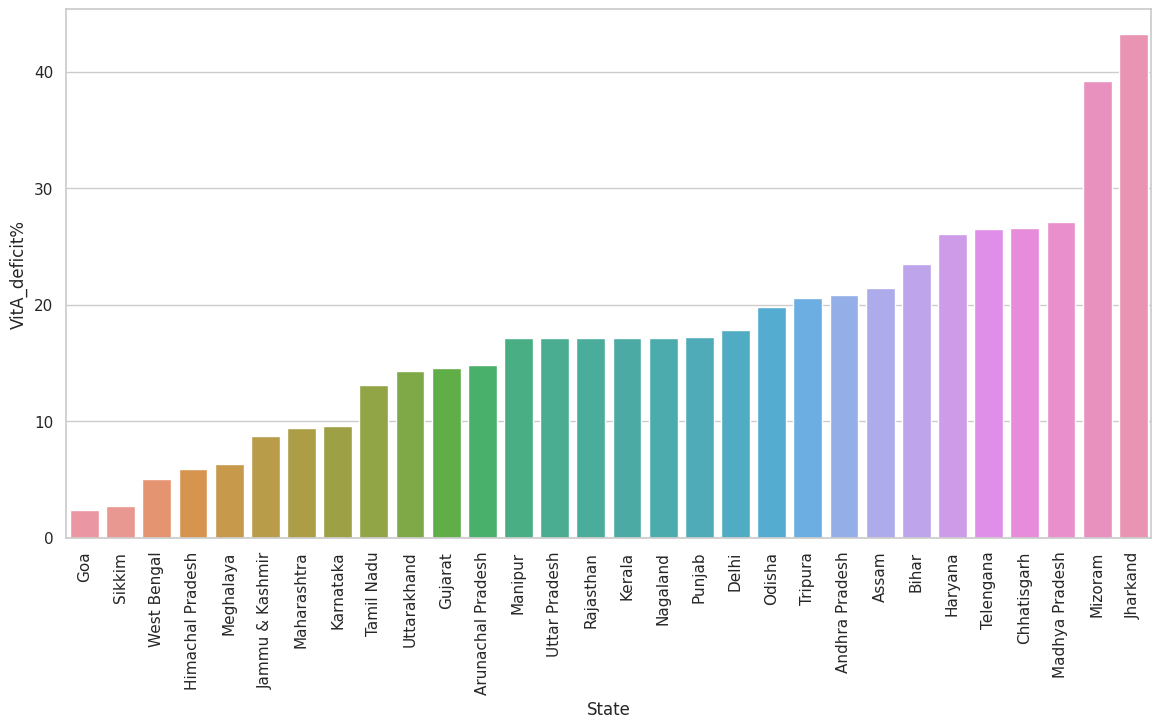

In [16]:
#plotting each state's deficiency of Vitamin A
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7),dpi=100)
plt.xticks(rotation=90);
ax = sns.barplot(x=vitamin_df.sort_values('VitA_deficit%')['State'], y="VitA_deficit%", data=vitamin_df)
print("Below graph shows the deficiency of Vit A in each state")

**From the above graph we can draw the insights that Jharkhand, Mizoram and Madhya Pradesh are the top 3 states where the  children have the highest Vitamin A deficiency.**

Below graph shows the deficiency of Vit D in each state


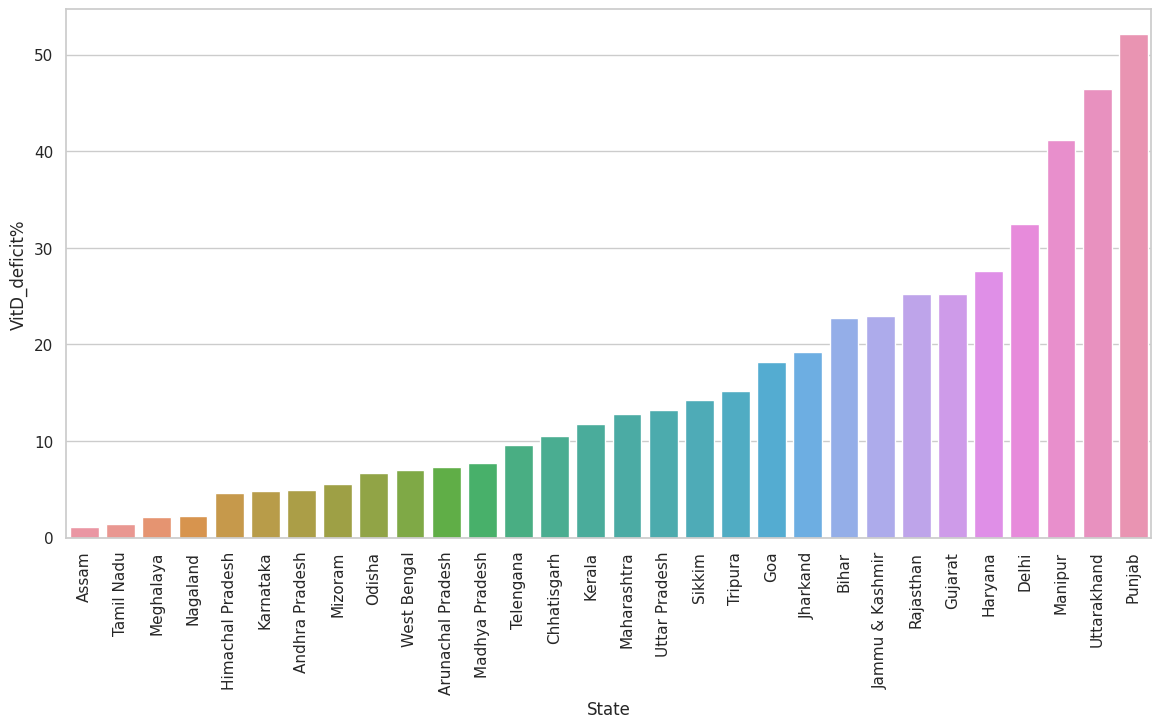

In [17]:
#plotting each state's deficiency of Vitamin D
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7),dpi=100)
plt.xticks(rotation=90);
ax = sns.barplot(x=vitamin_df.sort_values('VitD_deficit%')['State'], y="VitD_deficit%", data=vitamin_df)
print("Below graph shows the deficiency of Vit D in each state")

**From the above graph we can draw the insights that Punjab, Uttarakhand and Manipur are the top 3 states where the  children have the highest Vitamin D deficiency.**

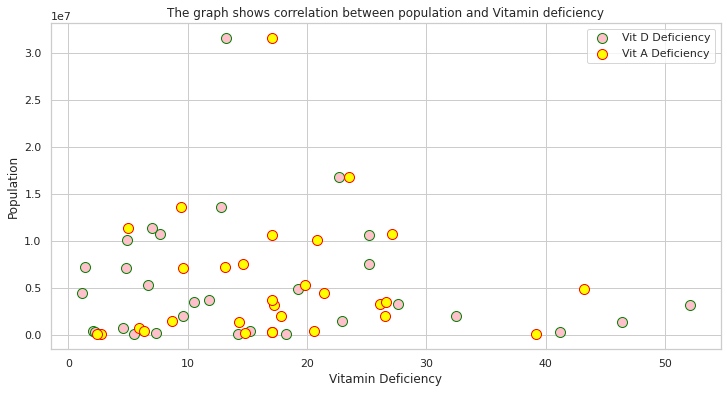

In [18]:
#let's see if the population and vitamin deficiency are correlated
plt.figure(figsize=(12,6))
plt.scatter(vitamin_df['VitD_deficit%'], vitamin_df['Population(0-6)years'], c ="pink",
            edgecolor ="green",s=100)
 
plt.scatter(vitamin_df['VitA_deficit%'], vitamin_df['Population(0-6)years'], c ="yellow",
            edgecolor ="red",s=100)
 
plt.xlabel("Vitamin Deficiency")
plt.ylabel("Population")
plt.legend(["Vit D Deficiency", "Vit A Deficiency"])
plt.title("The graph shows correlation between population and Vitamin deficiency")
plt.show()

**Above graph gives us an insight that the population and vitamin deficiency are not at all correlated to each other.**

#Clustering of Vitamin Deficiency

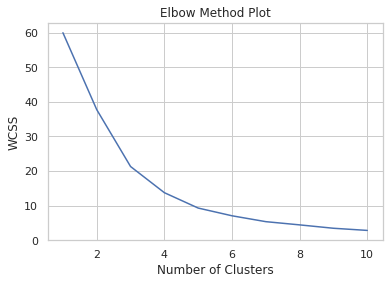

In [23]:
from sklearn.preprocessing import StandardScaler
train = vitamin_df[['VitA_deficit%','VitD_deficit%']]
sc= StandardScaler().fit(train)
train_std = sc.transform(train)
from sklearn.cluster import KMeans
wcss =[]
#wcss = Within Cluster Sum of Squares
for i in range(1,11):
    kmns= KMeans(n_clusters = i, init = 'k-means++', random_state =23)
    kmns.fit(train_std)
    wcss.append(kmns.inertia_)
    
#Plotting to find the optimum number of clusters    
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method Plot')
plt.grid(True)
plt.show()